## Step 1 - Load dataset

In [15]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv("data/covid_19_clean_complete.csv")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## Step 2 - Clean data 

In [17]:
# Checking datatype of 'Date' feature in the dataset
df['Date'].dtype

dtype('O')

It's **object** type so we need to convert to **datetime** datatype.

In [18]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df['Date'].dtype

dtype('<M8[ns]')

**"Date"** feature has been successfully converted to datetime type.

In [20]:
# Checking number of rows and columns in the dataset
df.shape

(49068, 10)

In [21]:
df.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

There are in total **49068** number of rows out of which there are **34404** rows where **"Province/State"** is **null**, since there are too many null values so we would not **drop** them rather **fill** the missing values.

Since, we do not have any idea on which **"Province/state"** there are covid cases for the respective missing values of **"Province/State"** so we will fill them with value **"Unknown"**.

In [22]:
# Filling with value "Unknown" for missing values
df.fillna('Unknown', inplace = True)

In [23]:
# Checking null values in the dataset
df.isna().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

Hence, there are **no** null values now in the dataset.

Next, we are going to **standardize country names** which means we are going to identify **inconsisent** country names and replace them with **consistent** name. For that, we are going to see all the country names in the **"Country/Region"** column.

In [24]:
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [25]:
# Mapping dictionary where we have taken all inconsistent country names as keys

country_mapping = {
    "US": "United States",
    "USA": "United States",
    "Mainland China": "China",
    "UK": "United Kingdom",
    "Republic of Korea": "South Korea",
    "Korea, South": "South Korea",
    "Iran (Islamic Republic of)": "Iran",
    "Russian Federation": "Russia",
    "Viet Nam": "Vietnam",
    "Taiwan*": "Taiwan"
}

In [26]:
# Apply the mapping
df["Country/Region"] = df["Country/Region"].replace(country_mapping)

In [27]:
# Cleaning spacing and formatting
df["Country/Region"] = (
    df["Country/Region"]
    .str.strip()
    .str.title()
)

In [29]:
# Verifying standardization
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia And Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote D'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

Now, we are seeing **clean, consistent** country names.

## Step 3 - Filter by country

In [30]:
india = df[df["Country/Region"] == "India"]

## Step 4 - Plot Daily Cases

Now, we are going to **plot** daily covid cases in **India**, before that we are going to **sort** time-series data.

In [32]:
india = india.sort_values("Date")

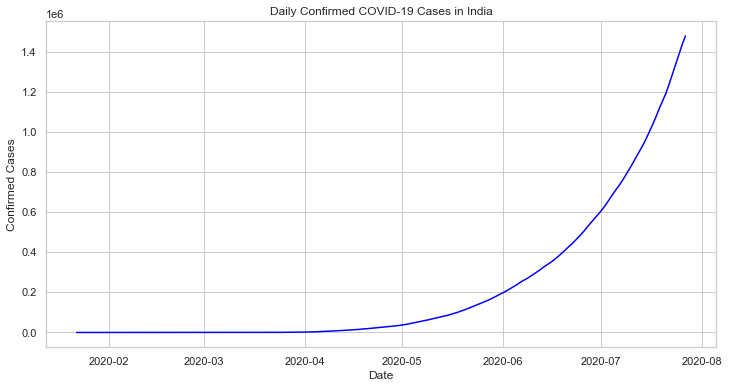

In [33]:
# Daily Confirmed Cases (Line Chart)
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.lineplot(data=india, x="Date", y="Confirmed", color="blue")
plt.title("Daily Confirmed COVID-19 Cases in India")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()

**Insights** :-

- Shows **growth trend** of COVID-19 cases in India.

- Helps identify **waves and peaks**.

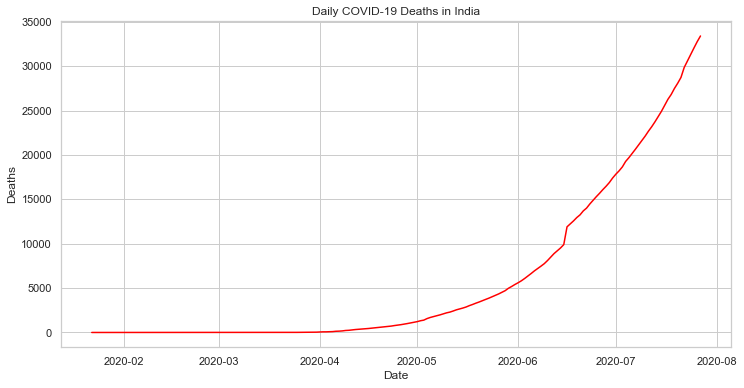

In [34]:
# Daily Deaths (Line Chart)
plt.figure(figsize=(12,6))
sns.lineplot(data=india, x="Date", y="Deaths", color="red")
plt.title("Daily COVID-19 Deaths in India")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.show()

**Insights** :-

- Reflects **severity and mortality trends**.

- Often lags behind confirmed cases

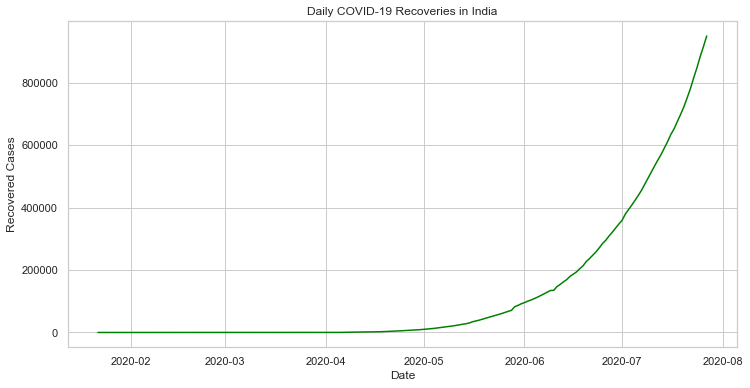

In [35]:
# Daily Recovered Cases (Line Chart)
plt.figure(figsize=(12,6))
sns.lineplot(data=india, x="Date", y="Recovered", color="green")
plt.title("Daily COVID-19 Recoveries in India")
plt.xlabel("Date")
plt.ylabel("Recovered Cases")
plt.show()

**Insights** :-

- Indicates **recovery rate improvements**

- Useful for evaluating healthcare response

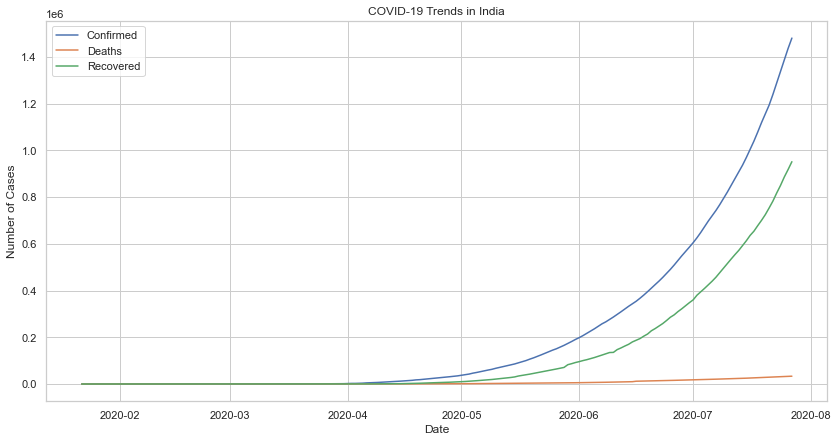

In [36]:
# Combined Trend (All Metrics using Line chart)
plt.figure(figsize=(14,7))

sns.lineplot(data=india, x="Date", y="Confirmed", label="Confirmed")
sns.lineplot(data=india, x="Date", y="Deaths", label="Deaths")
sns.lineplot(data=india, x="Date", y="Recovered", label="Recovered")

plt.title("COVID-19 Trends in India")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()

**Insights** :-

- Confirms **confirmed cases dominate**

- Death curve is much lower

- Recovery curve rises steadily over time

## Step 5 - Add Rolling Average 

In [37]:
# Creating 7-day rolling average for confirmed cases
india["Rolling_Confirmed_7D"] = india["Confirmed"].rolling(window=7).mean()

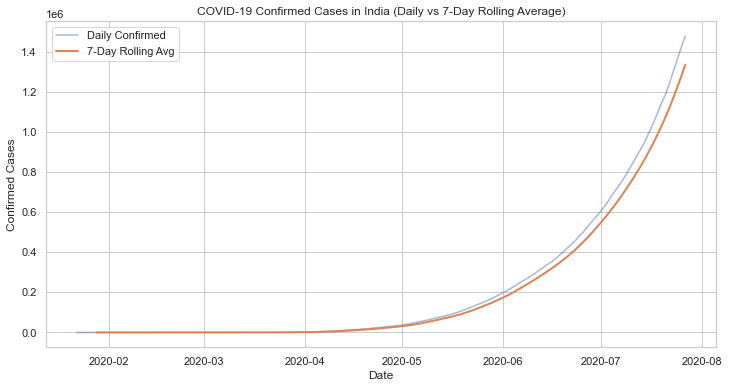

In [38]:
# Plotting Daily vs Rolling Average
plt.figure(figsize=(12,6))

sns.lineplot(data=india, x="Date", y="Confirmed", label="Daily Confirmed", alpha=0.5)
sns.lineplot(data=india, x="Date", y="Rolling_Confirmed_7D", label="7-Day Rolling Avg", linewidth=2)

plt.title("COVID-19 Confirmed Cases in India (Daily vs 7-Day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()

**Insights** :-

- Daily data is **noisy** due to reporting variations

- Rolling average shows a **smoother and clearer trend**

- Peaks and declines become easier to interpret

## Step 6 — Country Comparison

Now we compare COVID trends across countries such as **India**, **United States** and **China**.

In [39]:
countries = ["India", "United States", "China"]

comparison_df = df[df["Country/Region"].isin(countries)]
comparison_df = comparison_df.sort_values("Date")

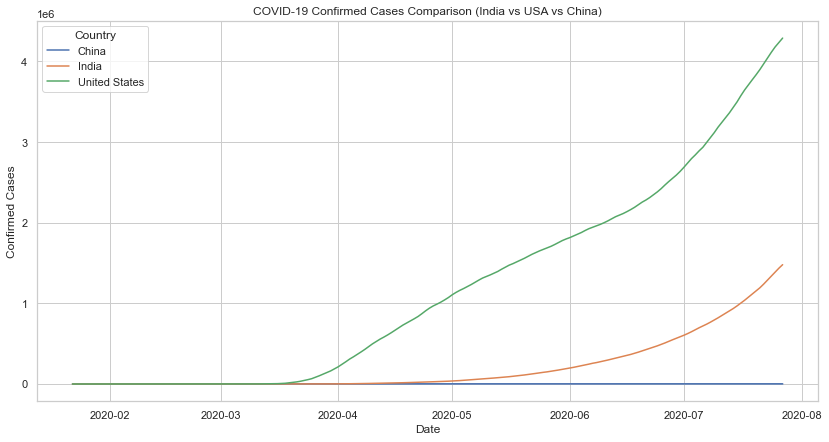

In [40]:
# Plotting Confirmed Cases Comparison
plt.figure(figsize=(14,7))

sns.lineplot(
    data=comparison_df,
    x="Date",
    y="Confirmed",
    hue="Country/Region"
)

plt.title("COVID-19 Confirmed Cases Comparison (India vs USA vs China)")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend(title="Country")
plt.show()

**Insights from Country Comparison** :-

- **USA** shows the **highest** overall confirmed cases

- **India** shows a steady and prolonged rise

- **China’s** curve flattens early, indicating early control

- **Rolling averages** make cross-country trends easier to compare